In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectPercentile, SelectKBest
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from scipy.stats import zscore
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore")


sns.set_style(style='darkgrid')

# Data pre-processing

In [3]:
veh_df = pd.read_csv("vehicle-1.csv")
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
veh_df.shape

(846, 19)

In [5]:
veh_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [6]:
veh_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

- The dataset is of shape (846,19)
- Out of 18 independent variable, 14 of them have null values
- All the columns are read as numeric columns (either float or int)
- All the independent variables are Continuous columns
- Categorical columns : 'class' which is also the target variable

In [7]:
veh_df[:].fillna((veh_df[:].median()), inplace = True)
veh_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

Replaced the null values with median of respective columns

In [8]:
veh_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

- Some of the variables looks skewed towards the right : radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1

- From the above description, we can figure out that all are measurements of lenght, but not aware of the unit of measurement.Thus, scaling the dataset will help increase the accuracy of the models.

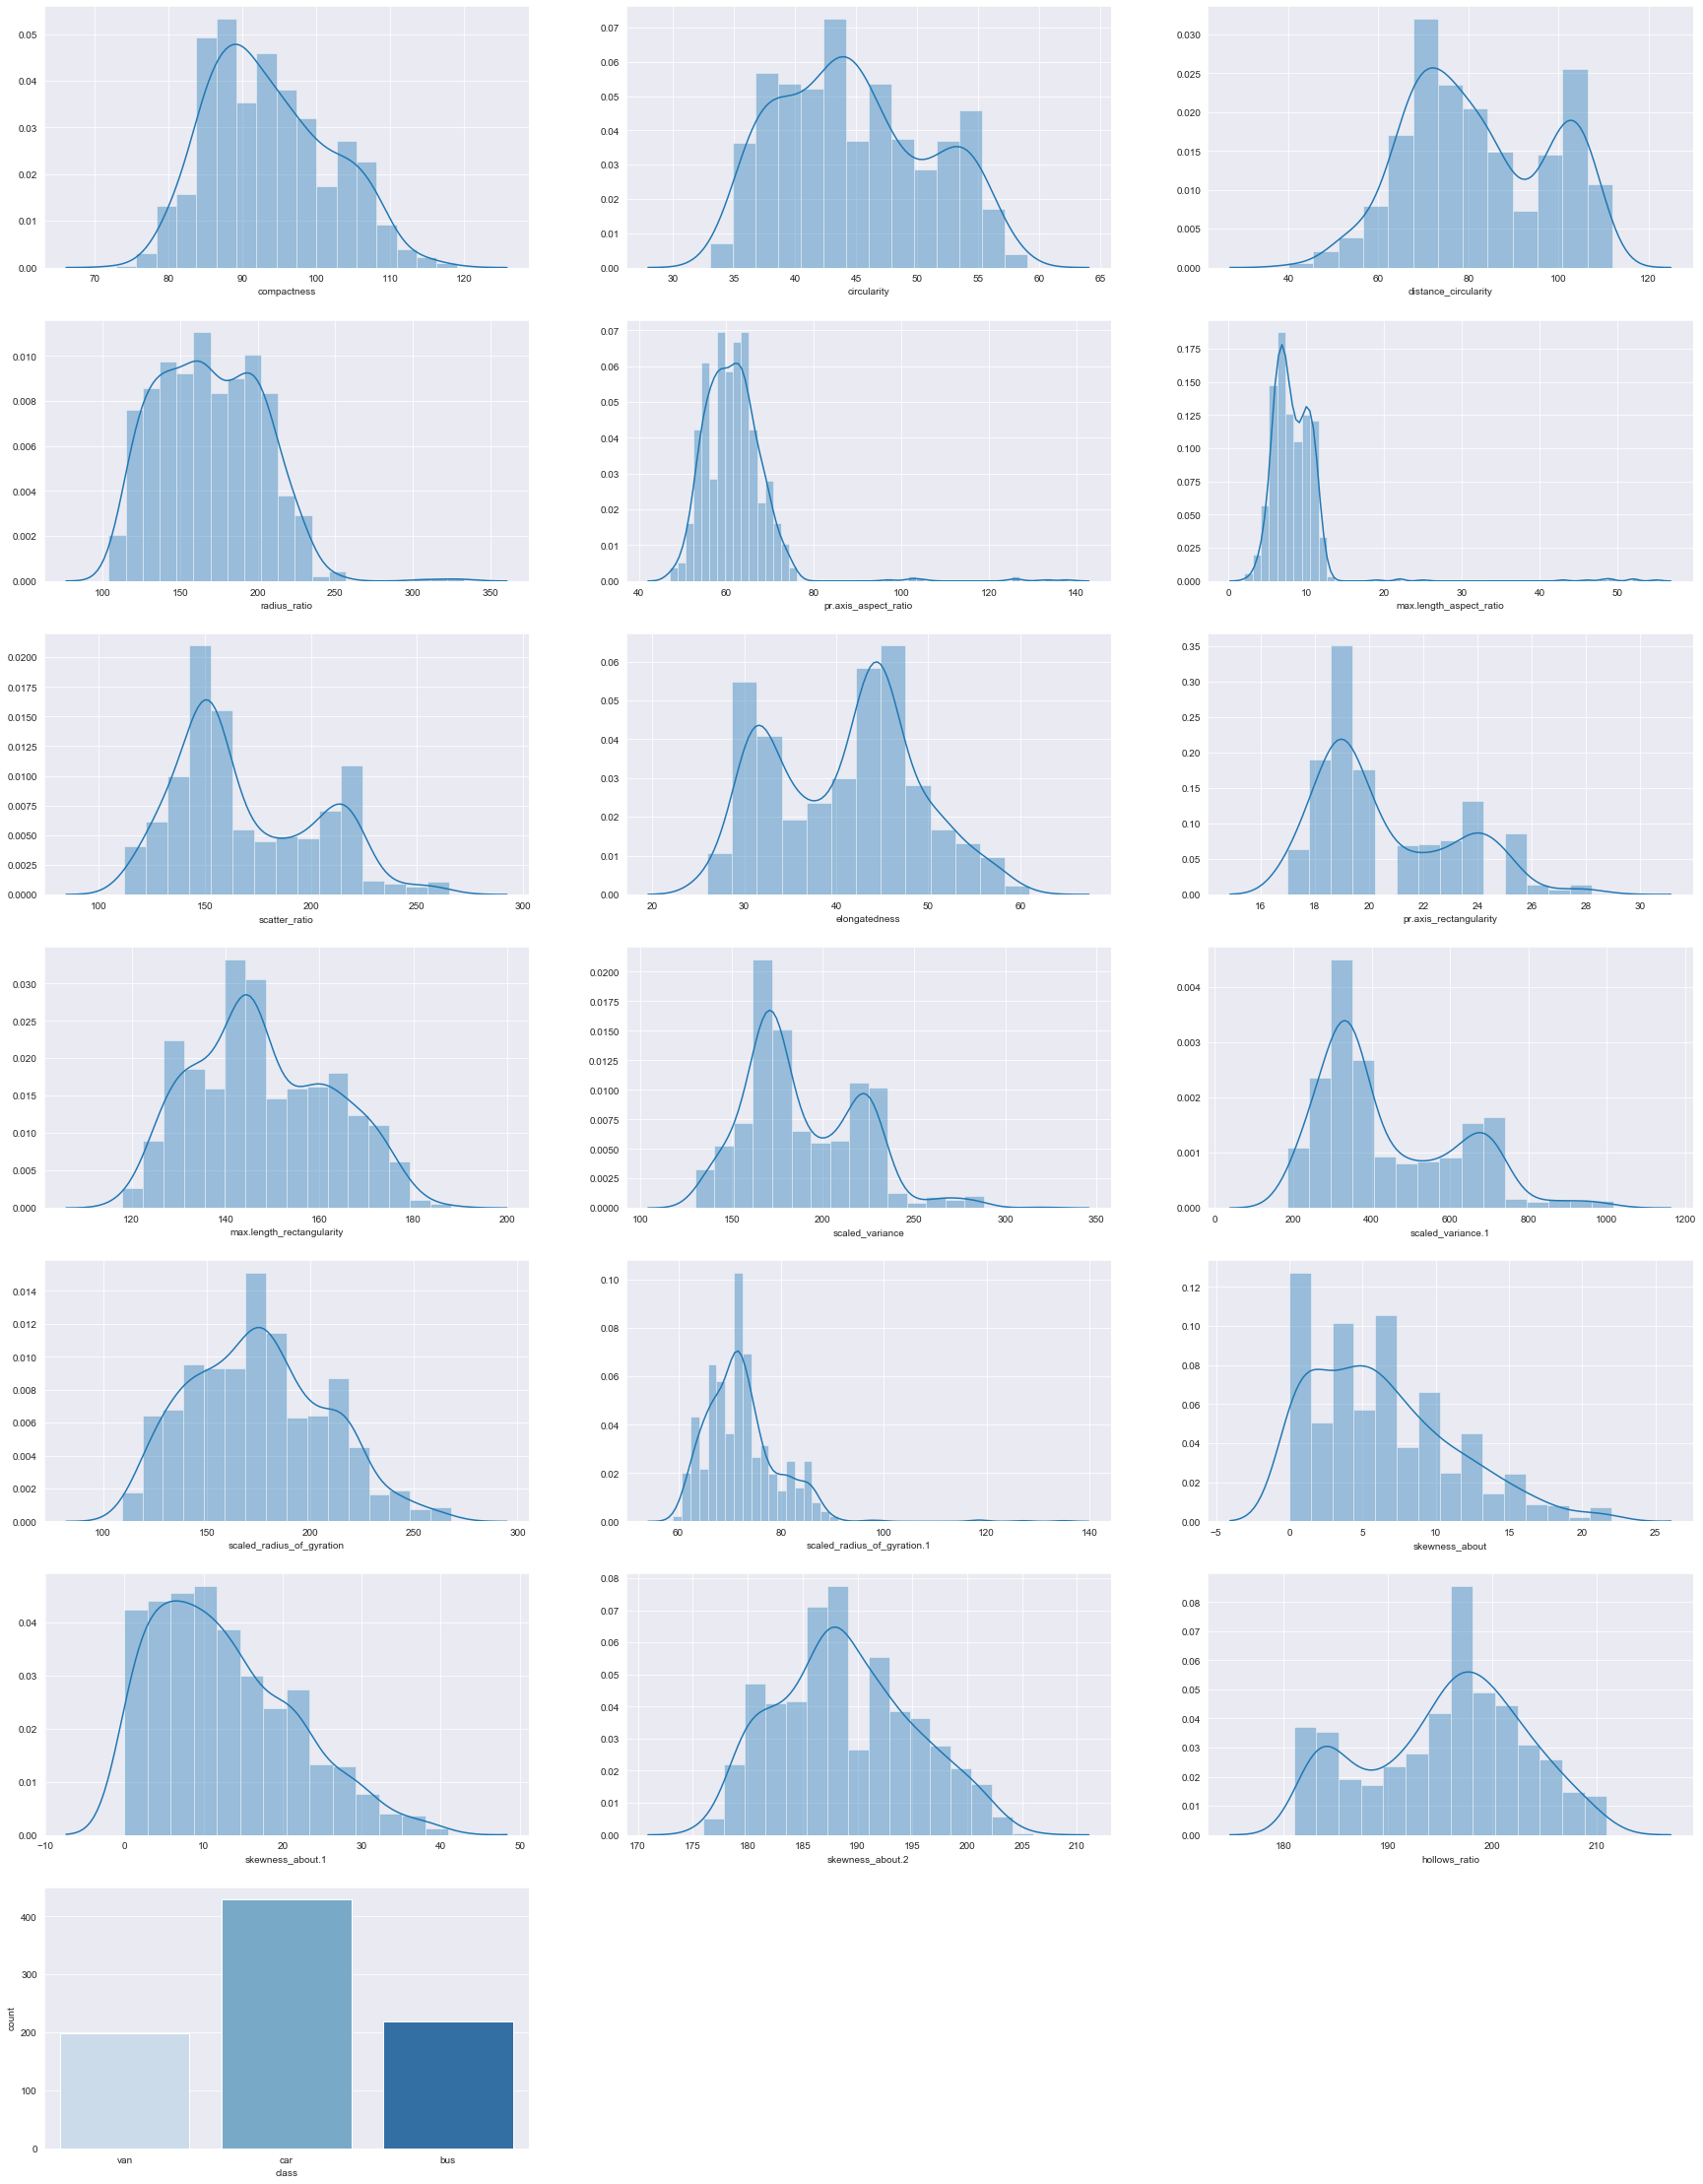

In [9]:
plt.figure(figsize= (30,40))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in veh_df.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(7, 3, pos)   # plot grid
    if feature in ['class']:   
        sns.countplot(veh_df[feature], palette= 'Blues') # Plot histogram for all the continuous columns           
    else:
        sns.distplot(veh_df[feature], kde= True )
           # Plot bar chart for all the categorical columns
    pos += 1  # to plot over the grid one by one  

In [10]:
veh_df[:].skew()

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
dtype: float64

- Most of the columns looks fairly ditributed as their skweness lies between the range of -1 to 1.
- pr.axis_aspect_ratio, max.length_aspect_ratio and scaled_radius_of_gyration.1 are highly skewed towards the right.

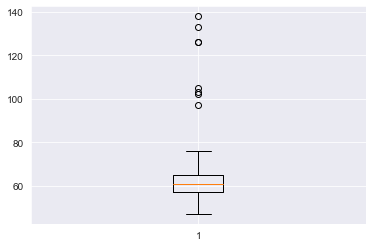

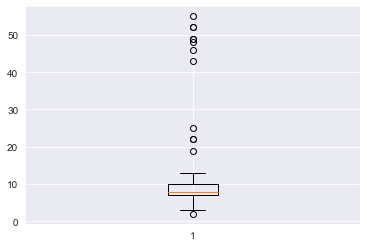

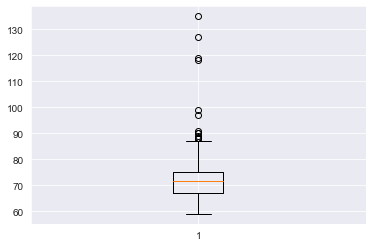

In [11]:
plt.boxplot(veh_df["pr.axis_aspect_ratio"])
plt.show()
plt.boxplot(veh_df['max.length_aspect_ratio'])
plt.show()
plt.boxplot(veh_df['scaled_radius_of_gyration.1'])
plt.show()

- We can see lot of outliers for all the 3 columns **'pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1'**

In [12]:
Q1 = veh_df[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']].quantile(0.25)
Q2 = veh_df[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']].quantile(0.50)
Q3 = veh_df[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q3)
print(Q1)

pr.axis_aspect_ratio           8.0
max.length_aspect_ratio        3.0
scaled_radius_of_gyration.1    8.0
dtype: float64
pr.axis_aspect_ratio           65.0
max.length_aspect_ratio        10.0
scaled_radius_of_gyration.1    75.0
Name: 0.75, dtype: float64
pr.axis_aspect_ratio           57.0
max.length_aspect_ratio         7.0
scaled_radius_of_gyration.1    67.0
Name: 0.25, dtype: float64


- Finding the interquartile range for all the 3 columns

In [13]:
veh_df[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']] = np.where(((veh_df[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']] < (Q1[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']] - 1.5 * IQR[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']])) |(veh_df[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']] > (Q3[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']] + 1.5 * IQR[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']]))), Q2[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']], veh_df[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']])

In [14]:
veh_df[['pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1']].describe()

pr.axis_aspect_ratio  max.length_aspect_ratio  \
count            846.000000               846.000000   
mean              61.154846                 8.118203   
std                5.613458                 2.064114   
min               47.000000                 3.000000   
25%               57.000000                 7.000000   
50%               61.000000                 8.000000   
75%               65.000000                10.000000   
max               76.000000                13.000000   

       scaled_radius_of_gyration.1  
count                   846.000000  
mean                     71.943853  
std                       6.158852  
min                      59.000000  
25%                      67.000000  
50%                      71.500000  
75%                      75.000000  
max                      87.000000

- Replacing the outliers with the Q2 which is median (not mean as median is less sensitive to outliers) of the respective columns

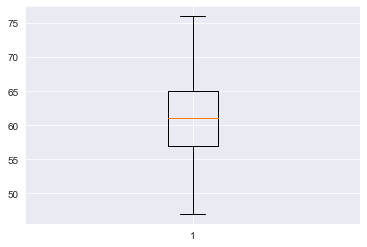

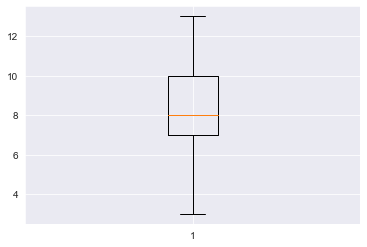

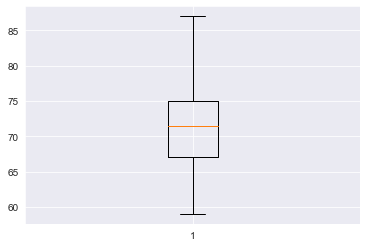

In [15]:
plt.boxplot(veh_df["pr.axis_aspect_ratio"])
plt.show()
plt.boxplot(veh_df['max.length_aspect_ratio'])
plt.show()
plt.boxplot(veh_df['scaled_radius_of_gyration.1'])
plt.show()

# Understanding the attributes

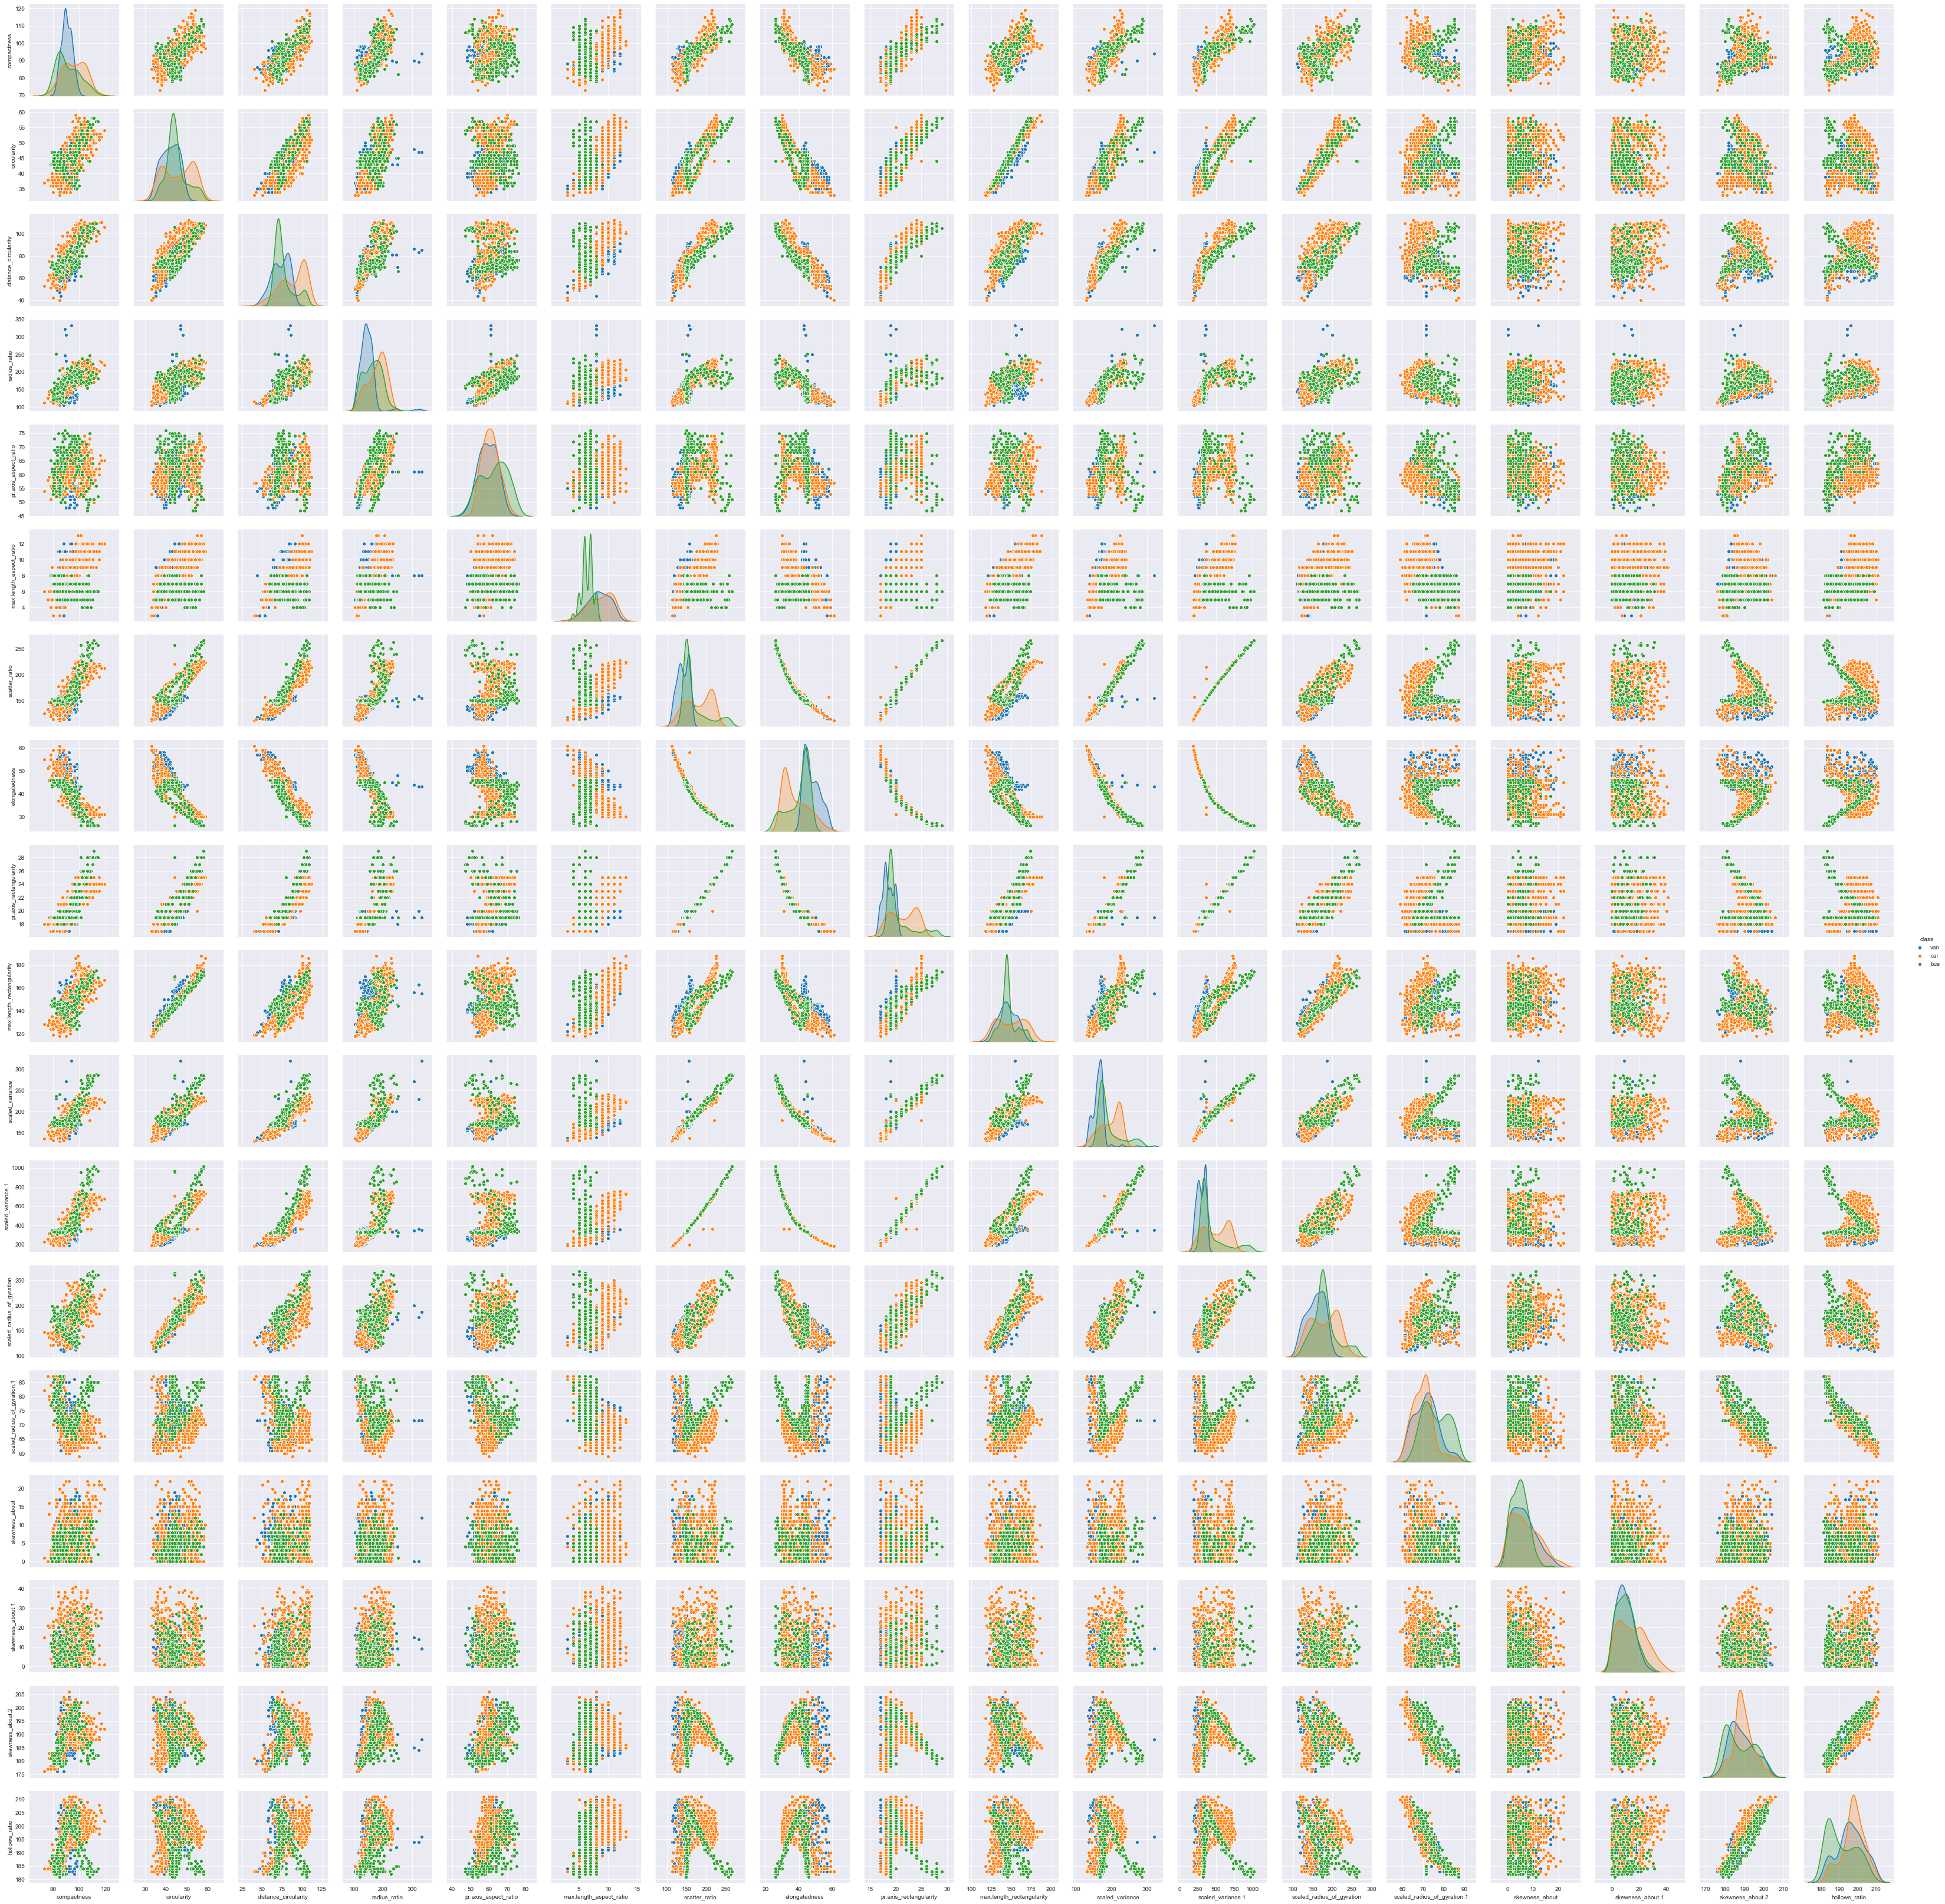

In [16]:
sns.pairplot(veh_df, hue = 'class', diag_kind='kde')    # pairplot
plt.show()

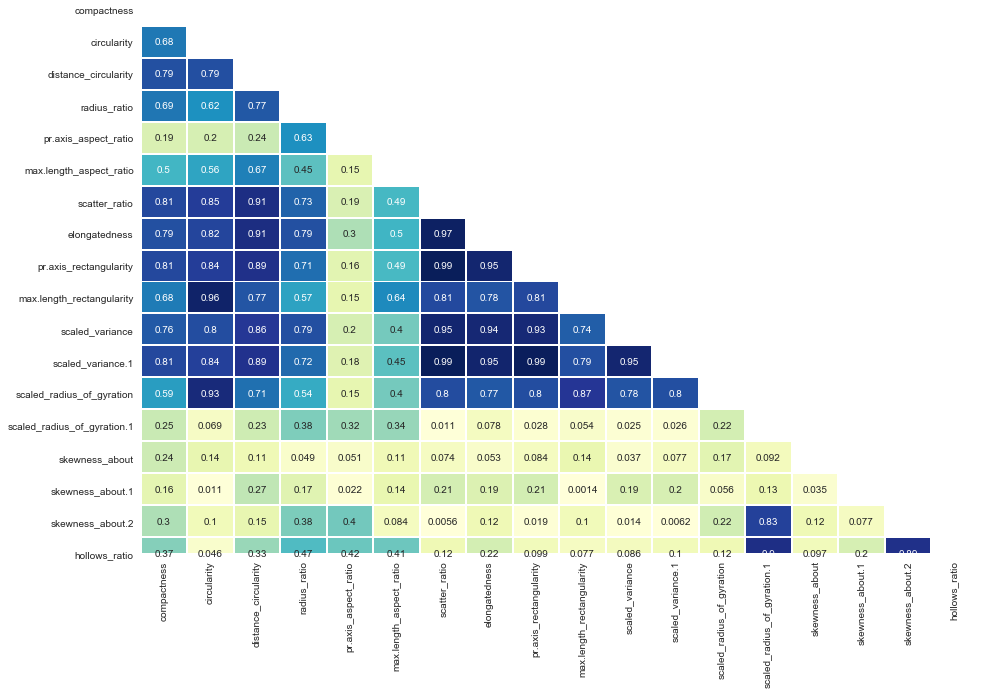

In [15]:
corr = abs(veh_df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,10))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'YlGnBu', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
#plt.xticks(rotation = 50)   # Aesthetic purposes
#plt.yticks(rotation = 10)   # Aesthetic purposes
plt.show()

- pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio seems to have very less correlation with most of the attributes.
- Other attributes seems to be highly correlated with each other, in this case if one attribute changes or shifts a little it impacts other attributes as well.
- In this case where the attributes are highly correlated, having all the variables might effect the accuracy and consistency of the model.
- Thus it is recommended to remove such dependency between variables and keep only the important features for the processing of the model.

In [16]:
veh_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

# Split the data into train and test

In [17]:
x = veh_df.drop(columns='class',axis=1)    # Predictors
y = veh_df.loc[:,'class'] # target
X = x.apply(zscore)

- Scaling the dataset to remove the difference due to units of measurement

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # Splitting the data in 80:20 ratio
print("Size of the training dataframe is ",len(X_train))
print("Size of the test dataframe is ",len(X_test))
print("{0:0.2f}% data is in training set".format((len(X_train)/len(veh_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(veh_df.index)) * 100))

Size of the training dataframe is  676
Size of the test dataframe is  170
79.91% data is in training set
20.09% data is in test set


In [19]:
total_bus = len(veh_df.loc[veh_df['class'] == 'bus'])
total_car = len(veh_df.loc[veh_df['class'] == 'car'])
total_van = len(veh_df.loc[veh_df['class'] == 'van'])
print("Total bus: {0} ({1:2.2f}%)".format(total_bus, (total_bus / (total_bus + total_car + total_van)) * 100 ))
print("Total car: {0} ({1:2.2f}%)".format(total_car, (total_car / (total_bus + total_car + total_van)) * 100 ))
print("Total van: {0} ({1:2.2f}%)".format(total_van, (total_van / (total_bus + total_car + total_van)) * 100 ))
print("")
print("Training bus: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'bus']), (len(y_train[y_train[:] == 'bus'])/len(y_train)) * 100))
print("Training car: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'car']), (len(y_train[y_train[:] == 'car'])/len(y_train)) * 100))
print("Training van: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'van']), (len(y_train[y_train[:] == 'van'])/len(y_train)) * 100))
print("")
print("Test bus: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'bus']), (len(y_test[y_test[:] == 'bus'])/len(y_test)) * 100))
print("Test car: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'car']), (len(y_test[y_test[:] == 'car'])/len(y_test)) * 100))
print("Test van: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'van']), (len(y_test[y_test[:] == 'van'])/len(y_test)) * 100))
print("")

Total bus: 218 (25.77%)
Total car: 429 (50.71%)
Total van: 199 (23.52%)

Training bus: 181 (26.78%)
Training car: 339 (50.15%)
Training van: 156 (23.08%)

Test bus: 37 (21.76%)
Test car: 90 (52.94%)
Test van: 43 (25.29%)



#### Finding the feature importance using the anova testing(f_classif) as all the independent variables are continuous and target variable is categorical

In [25]:
Selector_f = SelectKBest(f_classif, k = 14)
Selector_f.fit_transform(X,y)
for n,s in zip(X_train.columns,Selector_f.scores_):
     print (n, s)

compactness 45.428131296765415
circularity 30.37583357261885
distance_circularity 103.51809333404682
radius_ratio 81.624893519655
pr.axis_aspect_ratio 19.542937397325712
max.length_aspect_ratio 131.42698707254078
scatter_ratio 124.27395681465592
elongatedness 147.19385034625088
pr.axis_rectangularity 108.98797371095763
max.length_rectangularity 8.735419122938552
scaled_variance 100.81832710637958
scaled_variance.1 112.81203357390993
scaled_radius_of_gyration 40.98461069762356
scaled_radius_of_gyration.1 95.03130671664671
skewness_about 16.573421507032307
skewness_about.1 39.18519257482117
skewness_about.2 5.3101593965636695
hollows_ratio 58.839220737598296


#### Creating another dataset by removing the 4 least important feature from the dataset and scaling the same

In [20]:
x1 = veh_df.drop(['class','pr.axis_aspect_ratio','skewness_about','max.length_rectangularity','skewness_about.2'],axis=1)
y1 = veh_df.loc[:,'class'] # target
X1 = x1.apply(zscore)

In [22]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1) # Splitting the data in 80:20 ratio
print("Size of the training dataframe is ",len(X1_train))
print("Size of the test dataframe is ",len(X1_test))
print("{0:0.2f}% data is in training set".format((len(X1_train)/len(veh_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X1_test)/len(veh_df.index)) * 100))

Size of the training dataframe is  676
Size of the test dataframe is  170
79.91% data is in training set
20.09% data is in test set


# Train a Support vector machine

#### Creating an array and passing different SVC models and training/test datasets in the generic method to get the best accuracy of all the models 

In [23]:
def fit_n_print(model, Xtrain, Xtest, ytrain, ytest):  # take the model, and data as inputs
        
    model.fit(Xtrain, ytrain)   # fir the model with the train data

    score = round(model.score(Xtest, ytest), 3)   # compute accuracy score for test set
    
    return score

In [38]:
models=[]
models.append(('SVC_0',SVC(),X_train, X_test, y_train, y_test))
models.append(('SVC_0_rbf_gamma',SVC(gamma=0.025),X_train, X_test, y_train, y_test))
models.append(('SVC_0_rbf__gamma_C3',SVC(gamma=0.005, C=3),X_train, X_test, y_train, y_test))
models.append(('SVC_0_rbf_C5',SVC(c),X_train, X_test, y_train, y_test))
models.append(('SVC_0_linear',SVC(kernel='linear'),X_train, X_test, y_train, y_test))
models.append(('SVC_0_linear_gamma',SVC(kernel='linear',gamma=0.025),X_train, X_test, y_train, y_test))

# passing the training set having top 14 important features
models.append(('SVC_selected_features',SVC(),X1_train, X1_test, y1_train, y1_test))
models.append(('SVC_selected_features_linear',SVC(kernel='linear'),X1_train, X1_test, y1_train, y1_test))

In [39]:
result1 = pd.DataFrame({'Model':[],'Accuracy':[]})
for name,model,Xtrain, Xtest, ytrain, ytest in models:
    accuracy = fit_n_print(model, Xtrain, Xtest, ytrain, ytest)
    result1 = result1.append(pd.Series({'Model':name, 'Accuracy':accuracy}), ignore_index=True)
print(result1)

                          Model  Accuracy
0                         SVC_0     0.971
1               SVC_0_rbf_gamma     0.971
2           SVC_0_rbf__gamma_C3     0.953
3                  SVC_0_rbf_C5     0.988
4                  SVC_0_linear     0.965
5            SVC_0_linear_gamma     0.965
6         SVC_selected_features     0.935
7  SVC_selected_features_linear     0.853


- We can see the best accuracy achieved is 98.8% through SVC with default hyperparameters(kernel = 'rbf' and C=5) and actual training data
- Changing the kernel to linear does reduce the accuracy
- SVC with selected features is seen to have drop in the accuracy which is an expected drop

In [52]:
clf = svm.SVC(C=5)   
clf.fit(X_train , y_train)
score = round(clf.score(X_test, y_test), 3) 
print("Best Accuracy of SVC model:: {0}%".format(score*100))

Best Accuracy of SVC model:: 98.8%


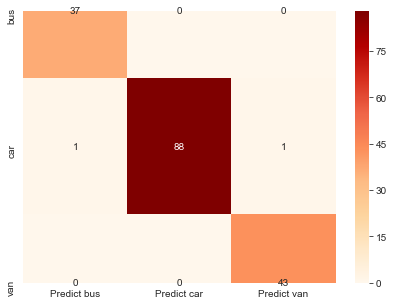

In [53]:
pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred, labels=["bus", "car", "van"])
df_cm = pd.DataFrame(cm, index = [i for i in ["bus", "car", "van"]],
                      columns = [i for i in ["Predict bus","Predict car","Predict van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap = "OrRd")

- True Bus = 37
- True car = 88
- True Van = 43

- False_bus/True_car = 1
- False_bus/True_van = 0

- False_car/True_bus = 0
- False_car/True_van = 0

- False_van/True_bus = 0
- False_van/True_car = 1

# Perform K-fold cross validation

In [62]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    x_tr,x_vl = X.loc[train_index],X.loc[test_index]
    y_tr,y_vl = y.loc[train_index],y.loc[test_index]
    
    #model
    clf = svm.SVC(C=9)  
    clf.fit(x_tr , y_tr)
    score = round(clf.score(x_vl, y_vl), 3) 
    print('Score:',score)
    cv_score.append(score)    
    i+=1

1 of KFold 5
Score: 0.953
2 of KFold 5
Score: 0.971
3 of KFold 5
Score: 0.976
4 of KFold 5
Score: 0.994
5 of KFold 5
Score: 0.964


The final accuracy output using the **StratifiedKFold method** = 96.4% with C=9 and split = 5

In [63]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(C=9)
scores = cross_val_score(clf, X, y, cv=5)
print("Best cross validation score of the model:: {0}%".format(scores[4]*100))

Best cross validation score of the model:: 98.20359281437125%


In [67]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X1,y1):
    print('{} of KFold {}'.format(i,kf.n_splits))
    x_tr,x_vl = X1.loc[train_index],X1.loc[test_index]
    y_tr,y_vl = y1.loc[train_index],y1.loc[test_index]
    
    #model
    clf = svm.SVC(kernel='rbf', C=9)  
    clf.fit(x_tr , y_tr)
    score = round(clf.score(x_vl, y_vl), 3) 
    print('Score:',score)
    cv_score.append(score)    
    i+=1
print("Best score of the StratifiedKFold method using SVC model:: {0}%".format(score*100))

1 of KFold 5
Score: 0.941
2 of KFold 5
Score: 0.947
3 of KFold 5
Score: 0.965
4 of KFold 5
Score: 0.953
5 of KFold 5
Score: 0.94
Best score of the StratifiedKFold method using SVC model:: 94.0%


# Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [69]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24697246  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.06882659  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22962442  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.62643168  0.44614154
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.37742696  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.1930925   0.20349327  0.24462154  0.62643168  1.00118343  0.15047265
   0.19442484 -0.29849719  0.163239

In [70]:
pca = PCA(n_components=18)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### The eigen Values

In [71]:
print(pca.explained_variance_)

[9.70447183e+00 3.34938713e+00 1.19798232e+00 1.15044476e+00
 8.73530980e-01 6.60093297e-01 3.16455108e-01 2.31753591e-01
 1.56020687e-01 1.11113255e-01 7.82797665e-02 6.39427265e-02
 4.15011651e-02 3.01077585e-02 2.30186860e-02 2.02168317e-02
 1.00118683e-02 2.97000154e-03]


#### The eigen Vectors

In [72]:
print(pca.components_)

[[ 2.73042735e-01  2.88462475e-01  3.02919659e-01  2.62018309e-01
   9.62850316e-02  1.95087228e-01  3.11140545e-01 -3.09243730e-01
   3.07959267e-01  2.79440101e-01  2.99173301e-01  3.07274262e-01
   2.64645627e-01 -4.06899032e-02  4.20944307e-02  5.86170664e-02
   3.65630145e-02  8.34724221e-02]
 [-8.99645105e-02  1.28287983e-01 -4.89781516e-02 -1.92322719e-01
  -2.56363243e-01 -1.11514464e-01  7.37584732e-02 -1.18339068e-02
   8.59875069e-02  1.18315077e-01  7.32390253e-02  8.09823419e-02
   2.07396772e-01  5.04739420e-01 -4.02444457e-02 -9.47921858e-02
  -5.01679811e-01 -5.08867604e-01]
 [ 6.86345615e-02  1.93549597e-01 -4.96408435e-02 -1.09071839e-01
  -4.88014087e-02  2.01972766e-01 -1.07009898e-01  1.05814826e-01
  -9.89836261e-02  2.18431017e-01 -1.55584386e-01 -1.09034386e-01
   1.87313584e-01 -8.48628379e-02  6.18541453e-01 -5.95584667e-01
   4.60187614e-02  4.81581018e-02]
 [ 1.37920443e-01 -7.56176642e-02  1.13824803e-01 -2.51944708e-01
  -6.13148738e-01  2.36922485e-01  2.

#### The percentage of variation explained by each eigen Vector

In [73]:
print(pca.explained_variance_ratio_)

[5.38500046e-01 1.85857114e-01 6.64759038e-02 6.38380500e-02
 4.84721354e-02 3.66285025e-02 1.75600582e-02 1.28599806e-02
 8.65757030e-03 6.16566198e-03 4.34373540e-03 3.54817467e-03
 2.30289496e-03 1.67067612e-03 1.27730429e-03 1.12182971e-03
 5.55557441e-04 1.64805050e-04]


#### Graphical representation of the Explained_variance_ratio and Eigen values

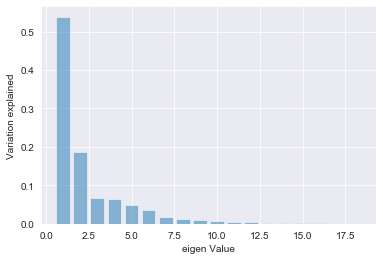

In [74]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Graphical representation of the Cumulative Explained_variance_ratio and Eigen values

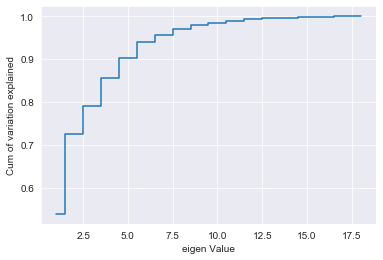

In [75]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

- We observe that 95% of the variance in the original data is achieved with 7 independent variables which can be chosen as 7 principal components

# Use Principal Components instead of the original data 

#### Creating a new dataset with 7 principal components and repeating the same above steps to find the best accuracy of the PCA model 

In [76]:
pca = PCA(n_components=7)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_ratio_)
X_pca = pca.transform(X)

[[ 2.73042735e-01  2.88462475e-01  3.02919659e-01  2.62018309e-01
   9.62850316e-02  1.95087228e-01  3.11140545e-01 -3.09243730e-01
   3.07959267e-01  2.79440101e-01  2.99173301e-01  3.07274262e-01
   2.64645627e-01 -4.06899032e-02  4.20944307e-02  5.86170664e-02
   3.65630145e-02  8.34724221e-02]
 [-8.99645105e-02  1.28287983e-01 -4.89781516e-02 -1.92322719e-01
  -2.56363243e-01 -1.11514464e-01  7.37584732e-02 -1.18339068e-02
   8.59875069e-02  1.18315077e-01  7.32390253e-02  8.09823419e-02
   2.07396772e-01  5.04739420e-01 -4.02444457e-02 -9.47921858e-02
  -5.01679811e-01 -5.08867604e-01]
 [ 6.86345615e-02  1.93549597e-01 -4.96408435e-02 -1.09071839e-01
  -4.88014087e-02  2.01972766e-01 -1.07009898e-01  1.05814826e-01
  -9.89836261e-02  2.18431017e-01 -1.55584386e-01 -1.09034386e-01
   1.87313584e-01 -8.48628379e-02  6.18541453e-01 -5.95584667e-01
   4.60187614e-02  4.81581018e-02]
 [ 1.37920443e-01 -7.56176642e-02  1.13824803e-01 -2.51944708e-01
  -6.13148738e-01  2.36922485e-01  2.

In [77]:
X_pca.shape

(846, 7)

In [94]:
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y, test_size=0.2, random_state=1)
print("Size of the training dataframe is ",len(Xpca_train))
print("Size of the test dataframe is ",len(Xpca_test))
print("{0:0.2f}% data is in training set".format((len(Xpca_train)/len(veh_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(Xpca_test)/len(veh_df.index)) * 100))

Size of the training dataframe is  676
Size of the test dataframe is  170
79.91% data is in training set
20.09% data is in test set


# Compare the accuracy scores and cross validation scores of Support vector machines

In [95]:
result2 = pd.DataFrame({'Model':[],'Accuracy':[]})
result2 = result1
accuracy = fit_n_print(SVC(), Xpca_train, Xpca_test, ypca_train, ypca_test)
result2 = result2.append(pd.Series({'Model':'SVC_pca', 'Accuracy':accuracy}), ignore_index=True)
accuracy = fit_n_print(SVC(C=3), Xpca_train, Xpca_test, ypca_train, ypca_test)
result2 = result2.append(pd.Series({'Model':'SVC_pca_C3', 'Accuracy':accuracy}), ignore_index=True)
accuracy = fit_n_print(SVC(kernel = 'linear'), Xpca_train, Xpca_test, ypca_train, ypca_test)
result2 = result2.append(pd.Series({'Model':'SVC_pca_linear', 'Accuracy':accuracy}), ignore_index=True)
accuracy = fit_n_print(SVC(kernel = 'linear', C=3), Xpca_train, Xpca_test, ypca_train, ypca_test)
result2 = result2.append(pd.Series({'Model':'SVC_pca_linear_C3', 'Accuracy':accuracy}), ignore_index=True)
print(result2)

                           Model  Accuracy
0                          SVC_0     0.971
1                SVC_0_rbf_gamma     0.971
2            SVC_0_rbf__gamma_C3     0.953
3                   SVC_0_rbf_C5     0.988
4                   SVC_0_linear     0.965
5             SVC_0_linear_gamma     0.965
6          SVC_selected_features     0.935
7   SVC_selected_features_linear     0.853
8                        SVC_pca     0.941
9                     SVC_pca_C3     0.929
10                SVC_pca_linear     0.865
11             SVC_pca_linear_C3     0.865


- The best SVC model with Principal components is with default hyperparameters = 94.1%
- We observe a drop in accuracy when we reduce dimensionality(7) to 94.1% as compared to the original dataset(98.8%) of ~5% in R^2!

In [96]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC()
scores = cross_val_score(clf, X_pca, y, cv=5)
print("Best cross validation score of the model:: {0}%".format(scores[4]*100))

Best cross validation score of the model:: 92.81437125748504%


- We observe a drop in accuracy in cross-validation when we reduce dimensionality(7) to 92.8% as compared to the original dataset(98.2%) of ~6% in R^2!